A way to get around R memory limits

In [1]:
from parcels import FieldSet, ParticleSet, JITParticle
from parcels import AdvectionRK4
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta as delta
import netCDF4
import xarray as xr

Read in files

In [2]:
data_netcdf4_n500 = netCDF4.Dataset('LAPS_sensitivity_n500_pld180_5m_Kh10_nday545_daily_07012012.nc')
# print(data_netcdf4_n500)


Load variables, this loads them as a numpy.ma.core.MaskedArray

In [3]:
trajectory_netcdf4_n500 = data_netcdf4_n500.variables['trajectory'][:]
time_netcdf4_n500= data_netcdf4_n500.variables['time'][:]
# Fix time to days not seconds
time_days_n500 = time_netcdf4_n500/86400
lon_netcdf4_n500 = data_netcdf4_n500.variables['lon'][:]
lat_netcdf4_n500 = data_netcdf4_n500.variables['lat'][:]
# age looks the same as time so not sure if this is needed
age_netcdf4_n500 = data_netcdf4_n500.variables['age'][:]
site_no_netcdf4_n500 = data_netcdf4_n500.variables['releaseSite'][:]
distance_netcdf4_n500 = data_netcdf4_n500.variables['distance'][:]
# print(distance_netcdf4_n500)

In [4]:
# check to see that all variables are the same dimensions
print(trajectory_netcdf4_n500.shape)
print(time_days_n500.shape)
print(lon_netcdf4_n500.shape)
print(lat_netcdf4_n500.shape)
print(age_netcdf4_n500.shape)
print(site_no_netcdf4_n500.shape)
print(distance_netcdf4_n500.shape)

(7503000, 181)
(7503000, 181)
(7503000, 181)
(7503000, 181)
(7503000, 181)
(7503000, 181)
(7503000, 181)


To get max distances for graphs and the corresponding site numbers

In [5]:
dist_n500 = pd.DataFrame(distance_netcdf4_n500)
maxDistance_n500 = dist_n500.max(axis=1)
# print(maxDistance_n500)
releasesite_n500 = pd.DataFrame(site_no_netcdf4_n500)
site_n500 = releasesite_n500.iloc[:, 0]
# print(site_n500)

In [6]:
#replace numbers with names of places
site_n500 = site_n500.replace(to_replace =1,
                 value ="Guam")
site_n500 = site_n500.replace(to_replace =2,
                 value ="Saipan")
site_n500 = site_n500.replace(to_replace =3,
                 value ="Majuro")
site_n500 = site_n500.replace(to_replace =4,
                 value ="Rongelap")
site_n500 = site_n500.replace(to_replace =5,
                 value ="Kiritimati")
site_n500 = site_n500.replace(to_replace =6,
                 value ="Pohnpei")
site_n500 = site_n500.replace(to_replace =7,
                 value ="Okinawa")
site_n500 = site_n500.replace(to_replace =10,
                 value ="FrenchFrigateShoal")
site_n500 = site_n500.replace(to_replace =11,
                 value ="Johnston")
site_n500 = site_n500.replace(to_replace =12,
                 value ="Wake")

In [7]:
maxdist_n500 = pd.DataFrame([site_n500,maxDistance_n500],['site','dist'])
maxdist_n500 = maxdist_n500.transpose()
print(maxdist_n500)

             site       dist
0            Guam  2477551.0
1            Guam  2477551.0
2            Guam  2477551.0
3            Guam  2477551.0
4            Guam  2477551.0
...           ...        ...
7502995  Johnston  2540074.0
7502996  Johnston  2540074.0
7502997  Johnston  2540074.0
7502998  Johnston  2540074.0
7502999  Johnston  2540074.0

[7503000 rows x 2 columns]


plot max distance

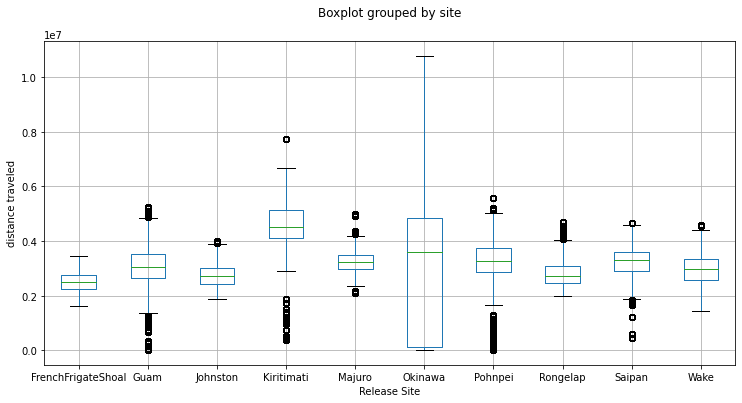

In [18]:
#distribution of max distances per release island
fig, axs = plt.subplots(figsize=(12, 6))
n500boxplot = maxdist_n500.boxplot(column='dist',by='site',ax=axs)
axs.set_ylabel("distance traveled")
axs.set_xlabel("Release Site")
axs.set_title('')
fig.savefig("boxplot_max_distance_n500.png")

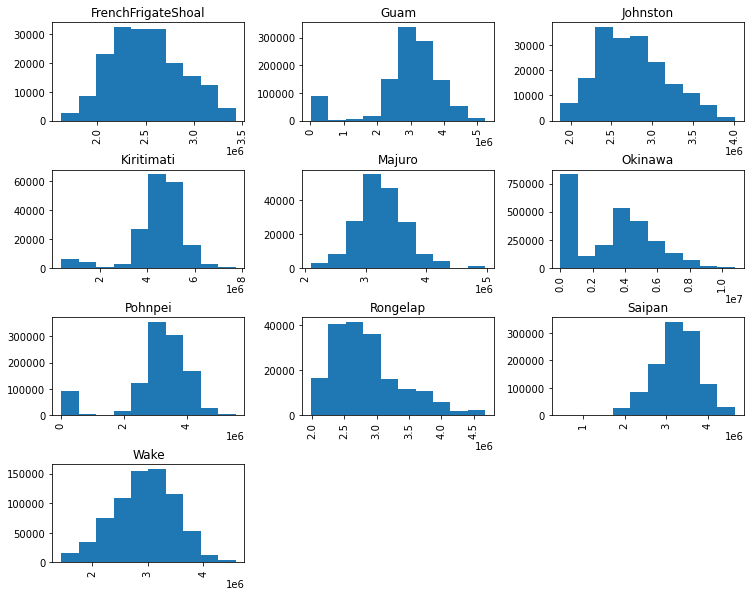

In [16]:
#distribution of max distances per release island
fig, axs = plt.subplots(figsize=(12, 10))
maxdist_n500.hist(column='dist',by='site',ax=axs)
fig.savefig("hist_per_site_max_distance_n500.png")

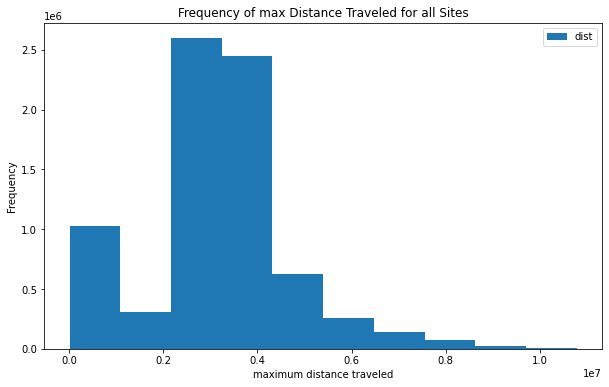

In [17]:
#distribution of max distances for entire model run
fig, axs = plt.subplots(figsize=(10, 6))
maxdist_n500.plot.hist(ax=axs)
axs.set_xlabel("maximum distance traveled")
axs.set_title('Frequency of max Distance Traveled for all Sites')
fig.savefig("hist_max_distance_allsites_n500.png")

Calculate the nearest neighbor 
First make a dataframe with relevant info: lon, lat, site, time, traj

Repeat the code for 100 particles released

In [19]:
data_netcdf4_n100 = netCDF4.Dataset('LAPS_sensitivity_n100_pld180_5m_Kh10_nday545_daily_07012012.nc')

In [20]:
trajectory_netcdf4_n100 = data_netcdf4_n100.variables['trajectory'][:]
time_netcdf4_n100= data_netcdf4_n100.variables['time'][:]
# Fix time to days not seconds
time_days_n100 = time_netcdf4_n100/86400
lon_netcdf4_n100 = data_netcdf4_n100.variables['lon'][:]
lat_netcdf4_n100 = data_netcdf4_n100.variables['lat'][:]
# age looks the same as time so not sure if this is needed
age_netcdf4_n100 = data_netcdf4_n100.variables['age'][:]
site_no_netcdf4_n100 = data_netcdf4_n100.variables['releaseSite'][:]
distance_netcdf4_n100 = data_netcdf4_n100.variables['distance'][:]
# print(distance_netcdf4_n100)

In [21]:
# check to see that all variables are the same dimensions
print(trajectory_netcdf4_n100.shape)
print(time_days_n100.shape)
print(lon_netcdf4_n100.shape)
print(lat_netcdf4_n100.shape)
print(age_netcdf4_n100.shape)
print(site_no_netcdf4_n100.shape)
print(distance_netcdf4_n100.shape)

(1500600, 181)
(1500600, 181)
(1500600, 181)
(1500600, 181)
(1500600, 181)
(1500600, 181)
(1500600, 181)


In [22]:
dist_n100 = pd.DataFrame(distance_netcdf4_n100)
maxDistance_n100 = dist_n100.max(axis=1)
# print(maxDistance_n100)
releasesite_n100 = pd.DataFrame(site_no_netcdf4_n100)
site_n100 = releasesite_n100.iloc[:, 0]
# print(site_n100)

In [23]:
#replace numbers with names of places
site_n100 = site_n100.replace(to_replace =1,
                 value ="Guam")
site_n100 = site_n100.replace(to_replace =2,
                 value ="Saipan")
site_n100 = site_n100.replace(to_replace =3,
                 value ="Majuro")
site_n100 = site_n100.replace(to_replace =4,
                 value ="Rongelap")
site_n100 = site_n100.replace(to_replace =5,
                 value ="Kiritimati")
site_n100 = site_n100.replace(to_replace =6,
                 value ="Pohnpei")
site_n100 = site_n100.replace(to_replace =7,
                 value ="Okinawa")
site_n100 = site_n100.replace(to_replace =10,
                 value ="FrenchFrigateShoal")
site_n100 = site_n100.replace(to_replace =11,
                 value ="Johnston")
site_n100 = site_n100.replace(to_replace =12,
                 value ="Wake")

In [24]:
maxdist_n100 = pd.DataFrame([site_n100,maxDistance_n100],['site','dist'])
maxdist_n100 = maxdist_n100.transpose()
print(maxdist_n100)

             site       dist
0            Guam  2477551.0
1            Guam  2477551.0
2            Guam  2477551.0
3            Guam  2477551.0
4            Guam  2477551.0
...           ...        ...
1500595  Johnston  2540074.0
1500596  Johnston  2540074.0
1500597  Johnston  2540074.0
1500598  Johnston  2540074.0
1500599  Johnston  2540074.0

[1500600 rows x 2 columns]


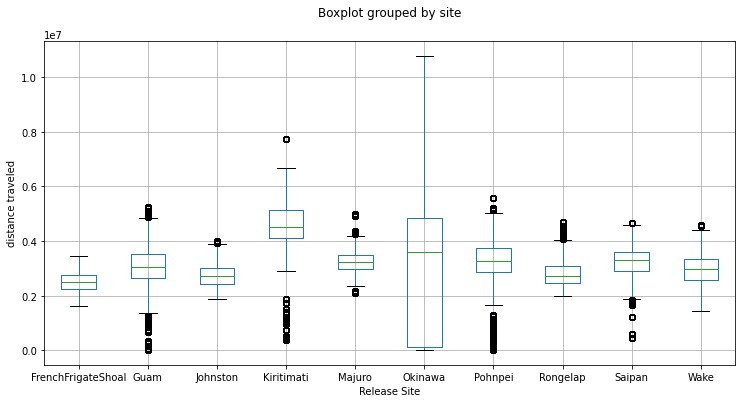

In [25]:
#distribution of max distances per release island
fig, axs = plt.subplots(figsize=(12, 6))
n100boxplot = maxdist_n100.boxplot(column='dist',by='site',ax=axs)
axs.set_ylabel("distance traveled")
axs.set_xlabel("Release Site")
axs.set_title('')
fig.savefig("boxplot_max_distance_n100.png")

/Users/taylorely/opt/miniconda3/envs/py3_parcels/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:428: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


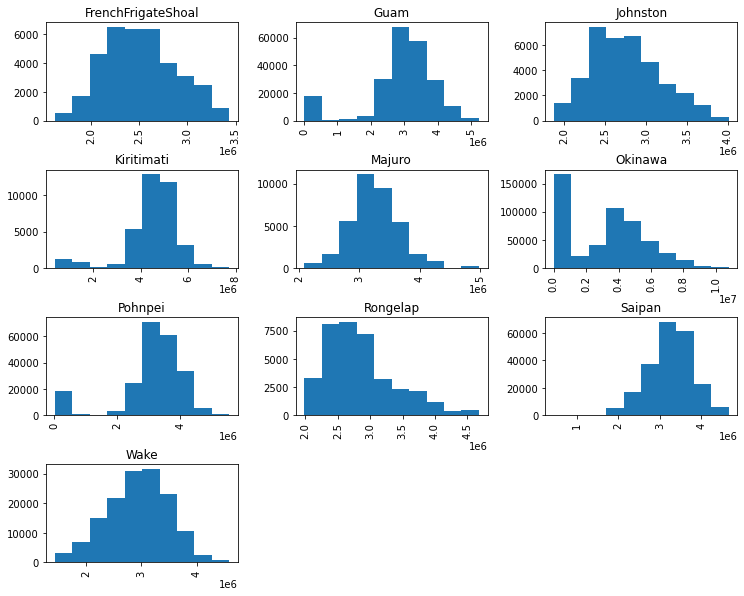

In [26]:
#distribution of max distances per release island
fig, axs = plt.subplots(figsize=(12, 10))
maxdist_n100.hist(column='dist',by='site',ax=axs)
fig.savefig("hist_per_site_max_distance_n100.png")

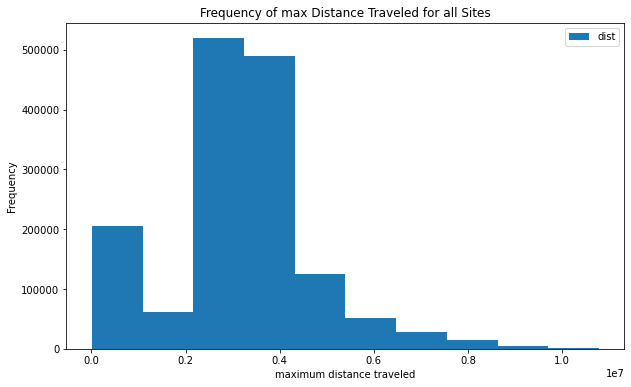

In [27]:
#distribution of max distances for entire model run
fig, axs = plt.subplots(figsize=(10, 6))
maxdist_n100.plot.hist(ax=axs)
axs.set_xlabel("maximum distance traveled")
axs.set_title('Frequency of max Distance Traveled for all Sites')
fig.savefig("hist_max_distance_allsites_n100.png")